In [1]:
#Importing Libraries

In [2]:
#Pandas – This library is used to load 2D array format and DataFrames.
#Numpy – It is used to perform large computations in a very short time.
#Matplotlib – This library is used to draw visualizations.
#Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
#OpenCV – This is an open-source library mainly focused on image processing and handling.
#Tensorflow – This is an open-source library that is used for Machine Learning and Artificial intelligence and provides a range of functions to achieve complex functionalities with single lines of code

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#from tensorflow import keras
import tensorflow.keras as keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [5]:
# Importing Dataset 

In [6]:
from zipfile import ZipFile

data_path = 'C:/Users/HI/Desktop/mk/adultclassifier/Adult content dataset.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')


The data set has been extracted.


In [7]:
# Data Visualization

In [8]:
#In this section, we will try to understand visualize some images which have been provided to us to build the classifier 
#for each class.

In [25]:
path = 'C:/Users/HI/Desktop/mk/adultclassifier/P2datasetFull/test1'
classes = os.listdir(path)
classes

['.DS_Store', 'adult', 'notadult']

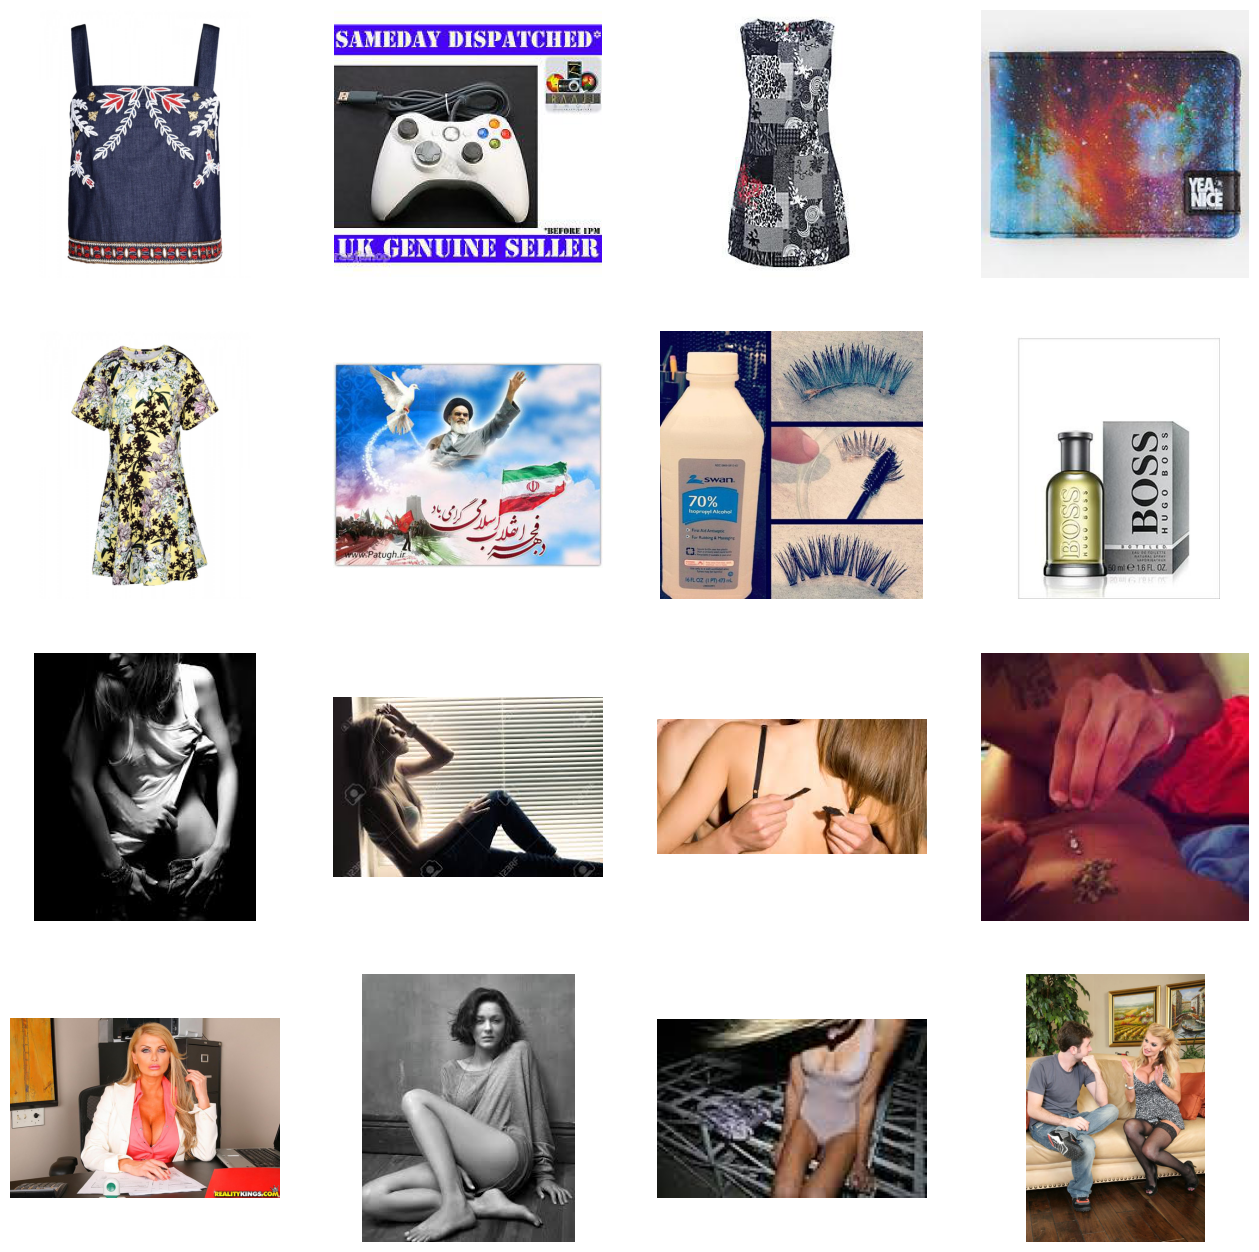

In [10]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

nadult_dir = os.path.join('C:/Users/HI/Desktop/mk/adultclassifier/P2datasetFull/test1/notadult')
adult_dir = os.path.join('C:/Users/HI/Desktop/mk/adultclassifier/P2datasetFull/test1/adult')
nadult_names = os.listdir(nadult_dir)
adult_names = os.listdir(adult_dir)

pic_index = 210

nadult_images = [os.path.join(nadult_dir, fname)
            for fname in nadult_names[pic_index-8:pic_index]]
adult_images = [os.path.join(adult_dir, fname)
            for fname in adult_names[pic_index-8:pic_index]]

for i, img_path in enumerate(nadult_images + adult_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [11]:
## Data Preparation for Training

In [12]:
# In this section, we will classify the dataset into train and validation format.

In [26]:
base_dir = 'C:/Users/HI/Desktop/mk/adultclassifier/P2datasetFull/test1'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                            image_size=(200,200),
                                            subset='training',
                                            seed = 1,
                                            validation_split=0.1,
                                            batch_size= 32)

test_datagen = image_dataset_from_directory(base_dir,
                                            image_size=(200,200),
                                            subset='validation',
                                            seed = 1,
                                            validation_split=0.1,
                                            batch_size= 32)


Found 6216 files belonging to 2 classes.
Using 5595 files for training.
Found 6216 files belonging to 2 classes.
Using 621 files for validation.


In [14]:
# Model Architecture

In [15]:
#The model will contain the following Layers:

#Four Convolutional Layers followed by MaxPooling Layers.
#The Flatten layer to flatten the output of the convolutional layer.
#Then we will have three fully connected layers followed by the output of the flattened layer.
#We have included some BatchNormalization layers to enable stable and fast training and a Dropout layer before the final layer to avoid any possibility of overfitting.
#The final layer is the output layer which has the activation function sigmoid to classify the results into two classes.

In [69]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='softmax')
])


In [17]:
# Let’s print the summary of the model’s architecture:

In [70]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 23, 23, 64)      

In [19]:
#The input image we have taken initially resized into 200 X 200. 
#And later it transformed into the binary classification value. 
#To understand the huge number of parameters and complexity of the model which helps us to achieve a high-performance model 
#let’s see the plot_model

In [71]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [72]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [22]:
## Model Training 

In [23]:
# Now we will train our model,  
#-the model is working fine on epochs = 10,
#but we can perform hyperparameter tuning for better results.

In [73]:
history = model.fit(train_datagen,
        epochs=10,
        validation_data=test_datagen)

Epoch 1/10
 56/175 [========>.....................] - ETA: 1:46 - loss: 0.7079 - accuracy: 0.5140

InvalidArgumentError: Graph execution error:

jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_23779]

In [32]:
#Filter out corrupted images

from PIL import Image

num_skipped = 0

for folder_name in ("adult", "notadult"):
    folder_path = os.path.join("test1", folder_name)
    for fname in os.listdir('C:/Users/HI/Desktop/mk/adultclassifier/P2datasetFull/test1'):
        fpath = os.path.join('C:/Users/HI/Desktop/mk/adultclassifier/P2datasetFull/test1', fname)
        if fname.endswith('.jpg'):
            try:
                img = Image.open(fpath) # open the image file
                #print("%s", fpath)
                exif_data = img._getexif()
                img.verify() # verify that it is, in fact an image
            except:
                num_skipped += 1
                # Delete corrupted image
                os.remove(fpath)
print("PIL deleted %d images" % num_skipped)

PIL deleted 0 images
